In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [78]:
df = pd.read_excel('../customer_churn_large_dataset.xlsx')

In [79]:
df.head()

,CustomerID,Name,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
0,1,Customer_1,63,Male,Los Angeles,17,73.36,236,0
1,2,Customer_2,62,Female,New York,1,48.76,172,0
2,3,Customer_3,24,Female,Los Angeles,5,85.47,460,0
3,4,Customer_4,36,Female,Miami,3,97.94,297,1
4,5,Customer_5,46,Female,Miami,19,58.14,266,0


In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   CustomerID                  100000 non-null  int64  
 1   Name                        100000 non-null  object 
 2   Age                         100000 non-null  int64  
 3   Gender                      100000 non-null  object 
 4   Location                    100000 non-null  object 
 5   Subscription_Length_Months  100000 non-null  int64  
 6   Monthly_Bill                100000 non-null  float64
 7   Total_Usage_GB              100000 non-null  int64  
 8   Churn                       100000 non-null  int64  
dtypes: float64(1), int64(5), object(3)
memory usage: 6.9+ MB


In [ ]:
#descriptive stats of numerical columms
df.describe()

: 

In [82]:
#descriptive stats of categorical columms
df.describe(include='object')

,Name,Gender,Location
count,100000,100000,100000
unique,100000,2,5
top,Customer_1,Female,Houston
freq,1,50216,20157


In [83]:
#Since CustomerID and Name is unique value and doesn't have impact on target variable
#We will drop them.
df.drop(['CustomerID','Name'],axis=1,inplace=True)

In [84]:
df.isnull().sum()

Age                           0
Gender                        0
Location                      0
Subscription_Length_Months    0
Monthly_Bill                  0
Total_Usage_GB                0
Churn                         0
dtype: int64

There is no missing values present in dataset

In [85]:
df[df.duplicated()]

,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn


There is no duplicate values in dataset

In [86]:
#segrating numerical and categorical columns

In [87]:
#numerical_cols = [feature for feature in df.columns if df[feature].dtype != "object"]
numerical_cols = list(df.dtypes[df.dtypes!='O'].index)

In [88]:
numerical_cols

['Age',
 'Subscription_Length_Months',
 'Monthly_Bill',
 'Total_Usage_GB',
 'Churn']

In [89]:
categorical_cols = [feature for feature in df.columns if df[feature].dtype == "object"]
#categorical_cols = list(df.dtypes[df.dtypes=='O'].index)

In [90]:
categorical_cols

['Gender', 'Location']

<Axes: >

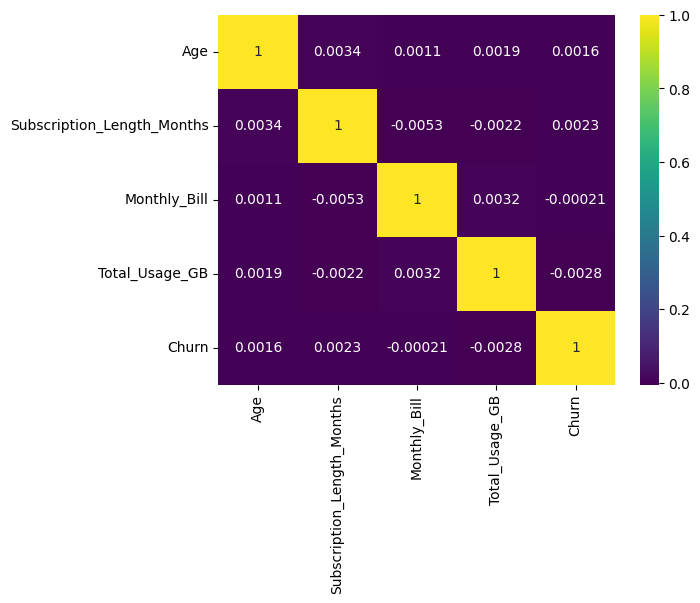

In [91]:
sns.heatmap(df[numerical_cols].corr(),cmap='viridis',annot=True)

In [92]:
#for column in numerical_cols:
    #print(column)
    #sns.histplot(x=df[column],kde=True)
    #plt.show()

In [93]:
#for column in categorical_cols:
    #print(column)
    #sns.countplot(x=df[column])
    #plt.show()

In [94]:
df['Gender'].value_counts()

Gender
Female    50216
Male      49784
Name: count, dtype: int64

In [95]:
df['Location'].value_counts()

Location
Houston        20157
Los Angeles    20041
Miami          20031
Chicago        19958
New York       19813
Name: count, dtype: int64

In [96]:
#Encoding
#Converting Categorical features into numerical features


In [97]:
gender = {'Female':0,'Male':1}

In [98]:
df['Gender'] = df['Gender'].map(gender)

In [99]:
df['Gender'].value_counts()

Gender
0    50216
1    49784
Name: count, dtype: int64

In [100]:
from sklearn.preprocessing import  OrdinalEncoder
ode=OrdinalEncoder()

In [101]:
df['Location'] = ode.fit_transform(df[['Location']])

In [102]:
df['Location'].value_counts()

Location
1.0    20157
2.0    20041
3.0    20031
0.0    19958
4.0    19813
Name: count, dtype: int64

In [103]:
df.head()

,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
0,63,1,2.0,17,73.36,236,0
1,62,0,4.0,1,48.76,172,0
2,24,0,2.0,5,85.47,460,0
3,36,0,3.0,3,97.94,297,1
4,46,0,3.0,19,58.14,266,0
